In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("./archive_anime/anime.csv")
print(df1.info())
print(df1.head())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&amp;#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   

In [3]:
anime_rec=df1.drop(["anime_id","name","type","episodes"],axis=1)
anime_rec.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genre    12232 non-null  object 
 1   rating   12064 non-null  float64
 2   members  12294 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 288.3+ KB


In [4]:
anime_rec = anime_rec.dropna()
anime_rec.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 12017 entries, 0 to 12293
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genre    12017 non-null  object 
 1   rating   12017 non-null  float64
 2   members  12017 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 375.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
anime_rec["genre"]=le.fit_transform(anime_rec["genre"])
anime_rec.head()

,genre,rating,members
0,2660,9.37,200630
1,159,9.26,793665
2,527,9.25,114262
3,3205,9.17,673572
4,527,9.16,151266


In [6]:
print(anime_rec.corr())
print(anime_rec.describe())

            genre    rating   members
genre    1.000000 -0.214616 -0.148785
rating  -0.214616  1.000000  0.388499
members -0.148785  0.388499  1.000000
              genre        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean    1935.640426      6.478264  1.834888e+04
std      910.157494      1.023857  5.537250e+04
min        0.000000      1.670000  1.200000e+01
25%     1252.000000      5.890000  2.250000e+02
50%     2092.000000      6.570000  1.552000e+03
75%     2784.000000      7.180000  9.588000e+03
max     3228.000000     10.000000  1.013917e+06


In [8]:
print(anime_rec.head())

   genre  rating  members
0   2660    9.37   200630
1    159    9.26   793665
2    527    9.25   114262
3   3205    9.17   673572
4    527    9.16   151266


### Model Creation

In [9]:
x = np.array(anime_rec.iloc[:,:-1])
print(x)

[[2660.      9.37]
 [ 159.      9.26]
 [ 527.      9.25]
 ...
 [2874.      4.88]
 [2874.      4.98]
 [2874.      5.46]]


Text(0.5, 0, &#39;Genre&#39;)

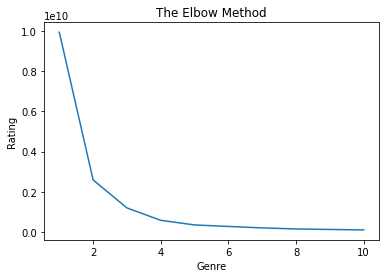

In [10]:
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1, 11): 
    kms = KMeans(n_clusters=i, random_state=42) 
    kms.fit(x) 
    wcss.append(kms.inertia_) 
plt.plot(range(1, 11), wcss) 
plt.title("The Elbow Method") 
plt.ylabel("Rating") 
plt.xlabel("Genre")

In [11]:
from sklearn.cluster import KMeans 
kms = KMeans(n_clusters=5, random_state=42) 
ypred = kms.fit_predict(x) 
ypred 

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

&lt;matplotlib.legend.Legend at 0x7fd89c194100&gt;

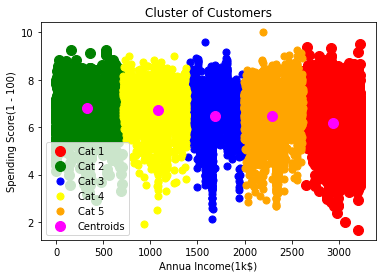

In [12]:
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s=100, c="red", label="Cat 1") 
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s=100, c="green", label="Cat 2") 
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1], s=50, c="blue", label="Cat 3") 
plt.scatter(x[ypred == 3, 0], x[ypred == 3, 1], s=50, c="yellow", label="Cat 4") 
plt.scatter(x[ypred == 4, 0], x[ypred == 4, 1], s=50, c="orange", label="Cat 5") 
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], s=100, c="magenta", label="Centroids") 
plt.title("Clusters of Animes") 
plt.xlabel("Rating") 
plt.ylabel("Genre") 
plt.legend() 

In [13]:
def predict(name):
    lst=[]
    for item in df1["name"]:
        if name==str(item):
            value = df1[df1["name"]==name]
            test_data=value.drop(["anime_id","name","type","episodes"],axis=1)
    test_data["genre"]=le.transform(test_data["genre"])
    print(test_data)        
    x = np.array(test_data.iloc[:,:-1])            
    pred=kms.predict(x)        
    test_data["genre"]=le.inverse_transform(pred)
    print(test_data,test_data["genre"])
    result_genre=list(np.array(test_data.iloc[:,0]))
    print(type(result_genre),result_genre)
    return result_genre

In [14]:
rg=predict("Fullmetal Alchemist: Brotherhood")

   genre  rating  members
1    159    9.26   793665
               genre  rating  members
1  Action, Adventure    9.26   793665 1    Action, Adventure
Name: genre, dtype: object
&lt;class &#39;list&#39;&gt; [&#39;Action, Adventure&#39;]


In [15]:
resultant_df=df1[df1["genre"]==rg[0]]
print(resultant_df["name"])

680                                     Michiko to Hatchin
3560     Naruto Movie 3: Dai Koufun! Mikazuki Jima no A...
5101                                 Juusen Battle Monsuno
7399                                    Explorer Woman Ray
7673                    Norakuro Nitouhei: Kyouren no Maki
7765                              Furudera no Obake-soudou
8902                                    Hong Gil Dong 2084
9089                  Kaitei Daisensou: Ai no 20,000 Miles
9499                                          Mask Masters
9862          Onimaru: Senjou ni Kakeru Itsutsu no Seishun
9878                                      Origami Warriors
10057                                 Raldessia Chronicles
10105                     Sabaku no Kaizoku! Captain Kuppa
10555    Time-Patrol Bon: Fujiko F. Fujio Anime Special...
10627                                    Twin Bee Paradise
Name: name, dtype: object
